## Analyze A/B Test Results

### By:                                         Quang Luong
### Project Due Date:                 9/11/2018
### Data Analyst NanoDegree:  June 2018 Cohort


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#number of dataset rows
print("# of dataset rows: {}".format(df.shape[0]))

# of dataset rows: 294478


c. The number of unique users in the dataset.

In [4]:
#unique users
df_unique_users = df.nunique().user_id
print('# of unique uses: {}'.format(df_unique_users))

# of unique uses: 290584


d. The proportion of users converted.

In [5]:
#proportions of users converted
df_converted = df.converted.mean()
print('proportions of users converted: {}'.format(df_converted))

proportions of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df_exp_group_page_mismatch = df.query("(group == 'treatment' and landing_page == 'old_page') or (group == 'control' and landing_page == 'new_page') ")
print('# times new_page don\'t line up with treatment: {}'.format(df_exp_group_page_mismatch.shape[0]))

# times new_page don't line up with treatment: 3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


no NULLs

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
#keeping only when group and landing_page align
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# find the number of unique users
print('unique users: {}'.format(df2.nunique().user_id))

unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# find the repeated userid
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
#see above

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# removing the repeated userid
df2 = df2.drop_duplicates(['user_id'])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# probability of converting regardless of page
print('probability of converting regardless of the page: {}'.format(df2.converted.mean()))

probability of converting regardless of the page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# probability of control group converting

control_df2 = df2[df2['group'] == 'control']['converted'].mean()
print('probability of Control group converted: {}'.format(control_df2))

probability of Control group converted: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# probability of treatment group converting
treatment_df2 = df2[df2['group'] == 'treatment']['converted'].mean()
print('probability of Treatment group converted: {}'.format(treatment_df2))

probability of Treatment group converted: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [18]:
# probability of individual receiving the new page
prop_new_page =  df2[df2['landing_page'] == 'new_page']['landing_page'].count()/df2.shape[0]
print('probability an individual received the new page: {}'.format(prop_new_page))

probability an individual received the new page: 0.5000619442226688


In [19]:
# probability of individual receiving the old page
print('probability an individual received the old page: {}'.format(1 - prop_new_page))

probability an individual received the old page: 0.4999380557773312


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Results:**

1. Probability of converting regardless of the page: 0.11959708724499628
2. Probability of Control group converted: 0.1203863045004612
3. Probability of Treatment group converted: 0.11880806551510564
4. Probability an individual received the new page: 0.5000619442226688
5. Probability an individual received the old page: 0.4999380557773312


* Probability of Individuals in either the Control (0.1203) or Treatment (0.1188) group converting are very close to each other.
* Probability of converting for users with new page (0.50) and users with old page (0.49) are also very similar.

#### Cannot say at this point if one page has more conversions. <BR><BR><BR>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* Null Hypothesis: **$p_{new}$** - **$p_{old}$** <= 0 (old page is same or better) <br>
* Alternate Hypothesis: **$p_{new}$** -  **$p_{old}$** > 0   (want to prove that the new page is better than the old)


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
#conversion rate for pnew under the null:
p_new = df2.converted.mean()
print('conversion rate for P_new under the null: {}'.format(p_new))

conversion rate for P_new under the null: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
#conversion rate for p_old under the null:
p_old = df2.converted.mean()
print('conversion rate for P_old under the null: {}'.format(p_old))

conversion rate for P_old under the null: 0.11959708724499628


c. What is $n_{new}$?

In [22]:
# number of new
n_new = df2.query("group == 'treatment'")['group'].count()
print('n_new: {}'.format(n_new))

n_new: 145310


d. What is $n_{old}$?

In [23]:
# number of old
n_old = df2.query("group == 'control'")['group'].count()
print('n_old: {}'.format(n_old))

n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# number of new page converted
new_page_converted = np.random.binomial(n_new, p_new)
print('simulating Nnew with a convert rate of Pnew under the null: {}'.format(new_page_converted ))

simulating Nnew with a convert rate of Pnew under the null: 17452


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# number of old page converted
old_page_converted = np.random.binomial(n_old, p_old)
print('simulating Nold with a convert rate of Pold under the null: {}'.format(old_page_converted ))

simulating Nold with a convert rate of Pold under the null: 17396


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# difference in simulated values
(new_page_converted/n_new) -  (old_page_converted/n_old)

0.00035571632471241565

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [27]:
# simulating 10000 values
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append( (new_page_converted/n_new) - (old_page_converted/n_old) )

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

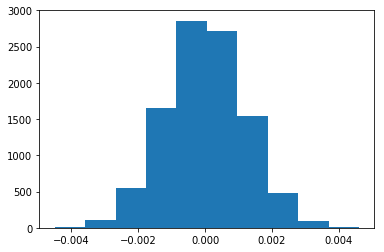

In [28]:
# plot the values
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# calculating the observed difference
obs_diff = treatment_df2 - control_df2 
obs_diff

pvalue = (p_diffs > obs_diff).mean()
print('Proportion of the p_diffs greater than the actual difference: {}'.format(pvalue))

Proportion of the p_diffs greater than the actual difference: 0.9098


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**<font color='blue'> Put your answer here.</font>**
__The p-value of .9024 - we should reject the null hypothesis  <BR><BR><BR>__

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and landing_page == 'old_page'").shape[0]

convert_new = df2.query("converted == 1 and landing_page == 'new_page'").shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# calculating z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print('z_score: {}\np_value: {}'.format(z_score, p_value))

z_score: 1.3109241984234394
p_value: 0.9050583127590245


In [32]:
# calculating the critical value for 95% confidence (or .05 error rate)
from scipy.stats import norm

critical_value = norm.ppf(1-(0.05/2))
print('critical value of 95%: {}'.format(critical_value))

critical value of 95%: 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**<font color='blue'> Put your answer here.</font>**

__The z-score__ of 1.31 is still within the critical value of 1.96, it falls within 1.96 standard deviation of the mean.   
__p-value__ is currently greater than the 0.05 error rate so we fail to reject the Null Hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**<font color='blue'> Put your answer here.</font>**
__Logistic Regression will be used to predict whenver there is only 2 possible outcomes. <BR><BR><BR>__

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# create intercept and dummy columns
df2['intercept'] = 1
groups = pd.get_dummies(df2['group'])
df2 = df2.join(groups)
df2.head()
 

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [34]:
# create ab_page column
#df2['ab_page'] = pd.get_dummies(df2['control'])[0]
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
# using statsmodel and logit
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:16:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [37]:
#'exponentiate' the coefficient
np.exp(-0.0150)

0.98511193960306265

In [38]:
#since value is less than 1, it's better to get the reciprocal:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**<font color='blue'> Put your answer here.</font>**
* __pvalue associated with ab_page:  0.190__
* __why does it differ from the value found in part II:  Because in Part III we used a sm.Logit function which is a two-sided test.   In Part II, we used proportions_ztest with alternative=smaller, which is not a one-sided test.__




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**<font color='blue'> Put your answer here.</font>**<BR>
__Advantages:  adding other factors are important because the outcome could have more independent variables acting on it.__<BR>
__Disadvantages: adding other factors also affect the variance.__



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [39]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# check for country values
df_country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
#merge  caller.set_index('key').join(other.set_index('key'))
df2_new = df2.set_index(['user_id']).join(df_country.set_index(['user_id']), how='inner')
df2_new.head()

,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,country
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,US


In [42]:
#create dummy variables
df2_new[['CA','US']] = pd.get_dummies(df2_new['country'])[['CA','US']]
 
df2_new.head()

,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,country,CA,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,US,0,1


In [43]:
df2_new['us_ab_page'] = df2_new['US'] * df2_new['ab_page']
df2_new['ca_ab_page'] = df2_new['CA'] * df2_new['ab_page']

In [44]:
# new model
df2_new['intercept'] = 1
log_mod = sm.Logit(df2_new['converted'], df2_new[['intercept', 'us_ab_page','ca_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:               3.272e-05
Time:                        19:16:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
us_ab_page    -0.0197      0.012     -1.634      0.102      -0.043       0.004
ca_ab_page    -0.0842      0.038     -2.225      0.026      -0.158      -0.010
==============================================================================
"""

In [45]:
# 'exponentiate' the coeficient
np.exp(-0.0197), np.exp(-0.0842)

(0.9804927770220988, 0.91924738823130492)

In [46]:
1/np.exp(-0.0197), 1/np.exp(-0.0842)

(1.0198953255292176, 1.087846441341616)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

#### Conclusion:

Conversions between the new and the old page are very close:

1) Users in the Control group converted is 0.1204, compared to users in Treatment group converted is 0.1188, which is very small difference. In addition, it is also very close to conversions regardless of the page: 0.1196.

2) Users with new page converting (0.50) and users with old page converting (0.49) are also very similar.

3)  When including factors such as countries (Canada and US), the conversion rates are also similar to each other:
* It appears that for each unit increase in country Canada, conversion is 0.91 times as likely, holding all else constant.
* It appears that for each unit increase in country US, conversion is 0.98 times as likely, holding all else constant.
* It appears that there is no evidence that country has an effect on page conversion.

**Therefore, regardless of the factors used to determine page conversion, there is no evidence that the new page is better than the old page.  **.  



#### Resources:

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
* http://www.statisticshowto.com/probability-and-statistics/z-score/
* https://newonlinecourses.science.psu.edu/statprogram/reviews/statistical-concepts/hypothesis-testing/critical-value-approach
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0